In [1]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.sample.sampler import independent
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from cosmic.evolve import Evolve
from cosmic.utils import convert_kstar_evol_type
from cosmic.plotting import evolve_and_plot

import tqdm

In [2]:
WD = [10, 11, 12]
MS = [0, 1]

In [3]:
InitialBinaries, mass_singles, mass_binaries, n_singles, n_binaries = InitialBinaryTable.sampler('independent', 
                                                                                                 WD, 
                                                                                                 MS, 
                                                                                                 binfrac_model='vanHaaften', 
                                                                                                 primary_model='kroupa01', 
                                                                                                 ecc_model='uniform', 
                                                                                                 porb_model='moe19', 
                                                                                                 SF_start=13700.0, 
                                                                                                 SF_duration=0.0, 
                                                                                                 met=0.02, 
                                                                                                 size=10000)

/Users/runqiuye/anaconda3/envs/cosmic/lib/python3.10/site-packages/cosmic/sample/sampler/independent.py:200: UserWarning: your supplied binfrac_model has been overwritten to 0.46 match Moe+2019
  warnings.warn('your supplied binfrac_model has been overwritten to {} match Moe+2019'.format(binfrac_model))


In [4]:
print(InitialBinaries)

       kstar_1  kstar_2    mass_1    mass_2          porb       ecc  \
0          0.0      0.0  0.628353  0.550073  2.162171e+02  0.353183   
1          1.0      1.0  2.998433  2.712379  2.285976e+03  0.838456   
2          1.0      0.0  1.268035  0.350693  3.514103e+05  0.125856   
3          1.0      1.0  6.529254  2.748538  2.314513e+04  0.308743   
4          0.0      0.0  0.526264  0.281164  4.266718e+02  0.871528   
...        ...      ...       ...       ...           ...       ...   
10089      1.0      0.0  1.030259  0.457640  1.807103e+00  0.314487   
10090      0.0      0.0  0.631363  0.320655  2.018390e+06  0.651671   
10091      1.0      1.0  2.297194  1.954748  1.273465e+04  0.517956   
10092      0.0      0.0  0.553285  0.337409  3.286619e+03  0.828156   
10093      1.0      1.0  2.228440  0.848230  8.960015e+06  0.550272   

       metallicity   tphysf   mass0_1   mass0_2  ...  tacc_1  tacc_2  epoch_1  \
0             0.02  13700.0  0.628353  0.550073  ...     0.0     0

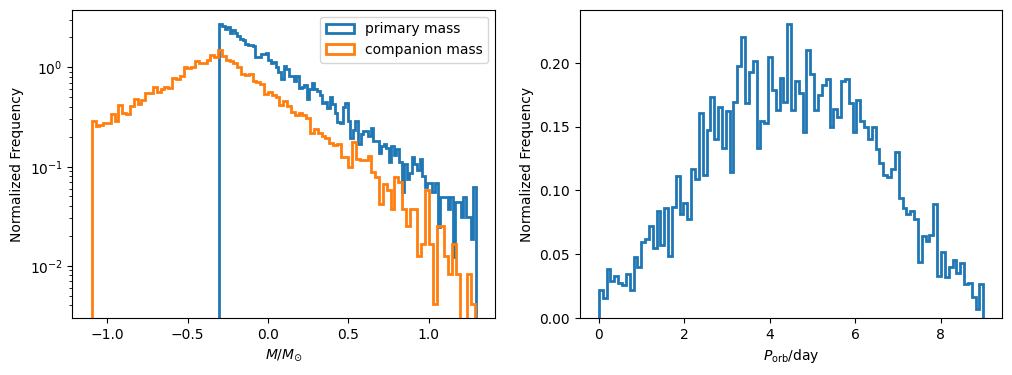

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(np.log10(InitialBinaries['mass_1']), bins=100, histtype='step', linewidth=2, label='primary mass', density=True)
axs[0].hist(np.log10(InitialBinaries['mass_2']), bins=100, histtype='step', linewidth=2, label='companion mass', density=True)
axs[0].set_yscale('log')

# Display the plot
axs[0].set_xlabel(r'$M/M_{\odot}$')
axs[0].set_ylabel('Normalized Frequency')
axs[0].legend()

axs[1].hist(np.log10(InitialBinaries['porb']), bins=100, histtype='step', linewidth=2, density=True)
axs[1].set_xlabel(r'$P_{\mathrm{orb}}$/day')
axs[1].set_ylabel('Normalized Frequency')

plt.show()

In [6]:
print(f'mass_singles = {mass_singles}')
print(f'mass_binaries = {mass_binaries}')
print(f'n_singles = {n_singles}')
print(f'n_binaries = {n_binaries}')

mass_singles = 32496.71929588267
mass_binaries = 42369.45244807487
n_singles = 54183
n_binaries = 45817


In [7]:
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 
           'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 
           'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 
           'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 
           'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 
           'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 
           'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 
           'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 
           'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 
           'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 
           'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 
           'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 
           'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 
           'zsun' : 0.019, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'rtmsflag' : 0, 
           'wd_mass_lim' : 1}

In [8]:
BSEDictList = [BSEDict.copy() for i in range(5)]
BSEDictList[0]['lambdaf'] = -5
BSEDictList[1]['lambdaf'] = -15
BSEDictList[2]['lambdaf'] = -25
BSEDictList[3]['lambdaf'] = -35
BSEDictList[4]['lambdaf'] = -45

In [9]:
print(BSEDictList[0]['lambdaf'])
print(BSEDictList[1]['lambdaf'])
print(BSEDictList[2]['lambdaf'])
print(BSEDictList[3]['lambdaf'])
print(BSEDictList[4]['lambdaf'])

-5
-15
-25
-35
-45


In [10]:
bppList = [0 for i in range(5)]
bcmList = [0 for i in range(5)]
initCList = [0 for i in range(5)]

In [11]:
for i in tqdm.tqdm(range(5)):
    bppList[i], bcmList[i], initCList[i], kick_info  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDictList[i])

100%|████████████████████████████████████████████| 5/5 [09:58<00:00, 119.75s/it]


In [12]:
# Used to convert separation in R_sun into AU
unit_factor = 1 / 215.032
for i in range(5):
    bppList[i]['sep in AU'] = bppList[i]['sep'] * unit_factor
    bcmList[i]['sep in AU'] = bcmList[i]['sep'] * unit_factor

In [14]:
rowList = [0 for i in range(5)]
startList = [0 for i in range(5)]

for i in range(5):
    cond1 = (bppList[i]['evol_type'] == 8) # Select evol type to be common envelope ends
    cond2 = (bppList[i]['kstar_1'] <= 12) 
    cond3 = (bppList[i]['kstar_1'] >= 10) # Select kstar_1 to be WD
    cond4 = (bppList[i]['kstar_2'] <= 1)
    cond5 = (bppList[i]['kstar_2'] >= 0) # Select kstar_2 to be MS
    rowList[i] = bppList[i].loc[(cond1) & (cond2) & (cond3) & (cond4) & (cond5)].groupby('bin_num',as_index=False).first()

    # select kstar_1 at the start of roche lobe overflow
    startRL = (bppList[i]['evol_type'] == 3)
    startList[i] = bppList[i].loc[(startRL)].groupby('bin_num',as_index=False).first()
    startList[i] = startList[i].loc[startList[i]['bin_num'].isin(rowList[i]['bin_num'])]

In [15]:
print(rowList[0][['tphys', 'mass_1', 'kstar_1', 'kstar_2', 'sep in AU', 'evol_type']])
print(rowList[1][['tphys', 'mass_1', 'kstar_1', 'kstar_2', 'sep in AU', 'evol_type']])
print(startList[0][['tphys', 'mass_1', 'kstar_1', 'kstar_2', 'sep in AU', 'evol_type']])
print(startList[1][['tphys', 'mass_1', 'kstar_1', 'kstar_2', 'sep in AU', 'evol_type']])

            tphys    mass_1  kstar_1  kstar_2  sep in AU  evol_type
0     4796.881523  0.451317     10.0      0.0   0.159168        8.0
1     5842.472937  0.304118     10.0      0.0   0.048750        8.0
2    12183.648225  0.229089     10.0      0.0   0.005119        8.0
3     4549.630110  0.288470     10.0      0.0   0.021105        8.0
4     2172.967192  0.521771     11.0      0.0   0.142963        8.0
..            ...       ...      ...      ...        ...        ...
895   7918.087837  0.376830     10.0      0.0   0.075847        8.0
896    629.677509  0.697659     11.0      0.0   1.121951        8.0
897   6211.526821  0.225907     10.0      0.0   0.007001        8.0
898   8387.779820  0.385906     10.0      1.0   0.306388        8.0
899  13626.435881  0.232006     10.0      0.0   0.021280        8.0

[900 rows x 6 columns]
             tphys    mass_1  kstar_1  kstar_2  sep in AU  evol_type
0      4796.881523  0.451317     10.0      0.0   0.377730        8.0
1      5842.472937  0.

In [65]:
# Make plot for lambdaf = -5 (i = 0)
DList = [dict() for i in range(5)]

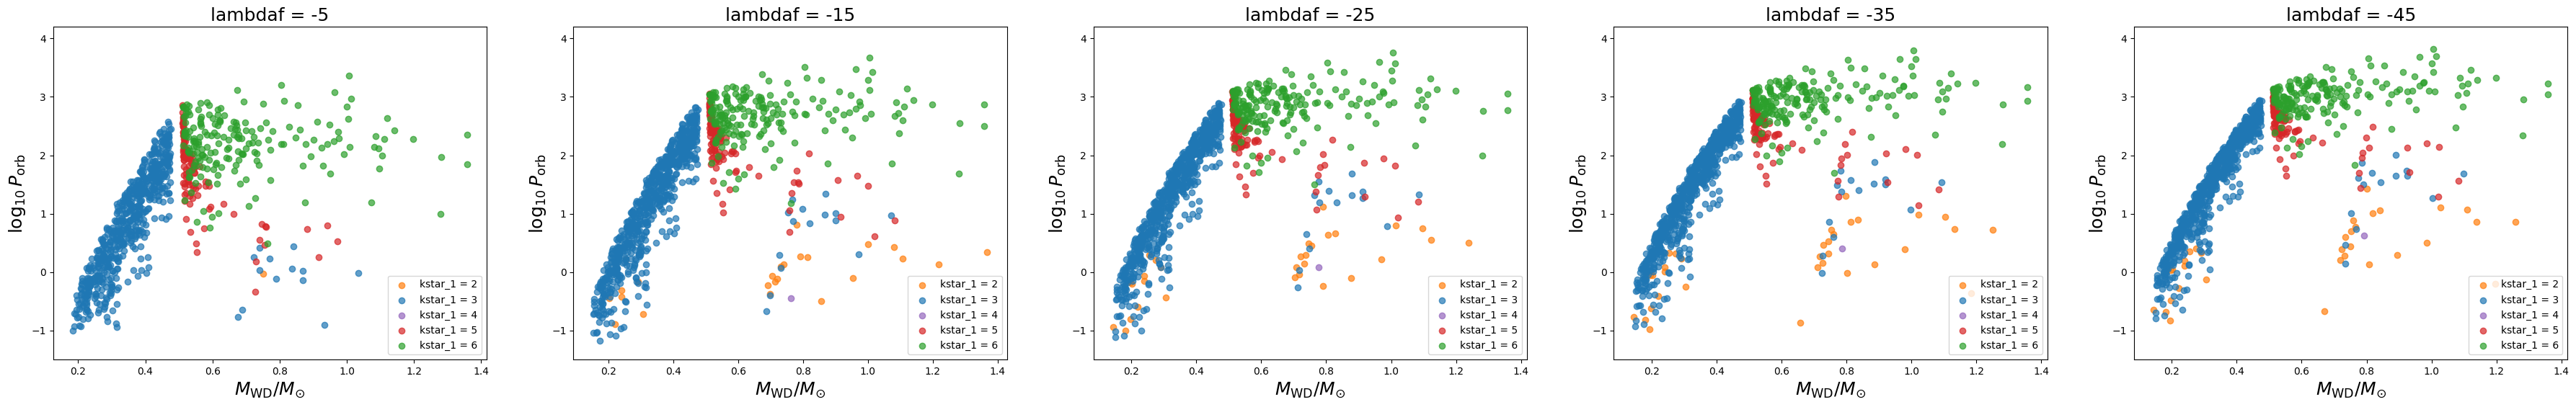

In [71]:
fig, axs = plt.subplots(1, 5, figsize=(45,6))
color = ['tab:orange', 'tab:blue', 'tab:purple', 'tab:red', 'tab:green']
for i in range(5):
    
    D = DList[i]
    for star in range(16):
        D[star] = startList[i].loc[(startList[i]['kstar_1'] == star)]['bin_num']
    
    for star in [2,3,4,5,6]:
        sublist = rowList[i].loc[rowList[i]['bin_num'].isin(D[star])]
        axs[i].scatter(sublist['mass_1'], np.log10(sublist['porb']), label = f'kstar_1 = {star}', c=color[star-2], alpha=0.7)
    axs[i].set_title(f'lambdaf = {-5 - 10*i}', fontsize=18)
    axs[i].set_xlabel(r'$M_{\mathrm{WD}} / M_{\odot}$', fontsize=18)
    axs[i].set_ylabel(r'$\log_{10} P_{\mathrm{orb}}$', fontsize=18)
    axs[i].set_ylim(-1.5, 4.2)
    axs[i].legend(loc='lower right')
plt.savefig('kstar_map',dpi=300)
plt.show()

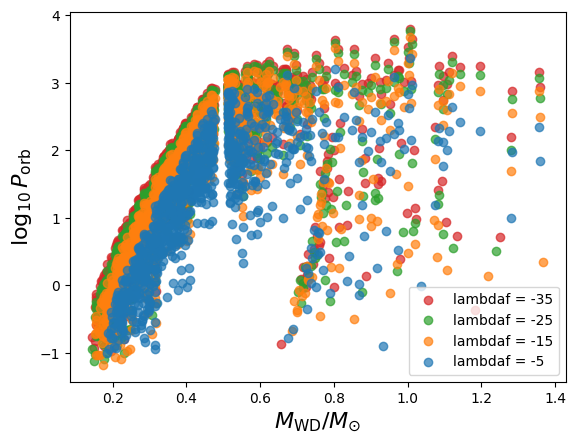

In [74]:
plt.scatter(rowList[3]['mass_1'], np.log10(rowList[3]['porb']), label=r'lambdaf = -35', color = 'tab:red', alpha = 0.7)
plt.scatter(rowList[2]['mass_1'], np.log10(rowList[2]['porb']), label=r'lambdaf = -25', color = 'tab:green', alpha = 0.7)
plt.scatter(rowList[1]['mass_1'], np.log10(rowList[1]['porb']), label=r'lambdaf = -15', color = 'tab:orange', alpha = 0.7)
plt.scatter(rowList[0]['mass_1'], np.log10(rowList[0]['porb']), label=r'lambdaf = -5', color = 'tab:blue', alpha = 0.7)
plt.xlabel(r'$M_{\mathrm{WD}}/ M_{\odot}$', fontsize=16)
plt.ylabel(r'$\log_{10} P_{\mathrm{orb}}$', fontsize=16)
plt.legend()
plt.savefig('Mwd-P scatter', dpi=300)
plt.show()

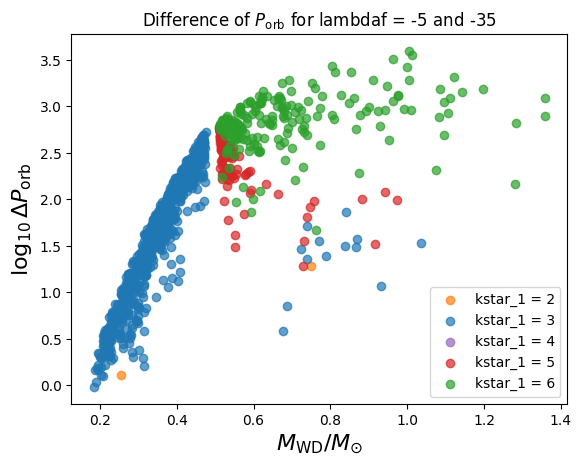

In [109]:
commonbinnums = np.intersect1d(rowList[0]['bin_num'], rowList[3]['bin_num'])
commonList3 = rowList[3].loc[rowList[3]['bin_num'].isin(commonbinnums)]
commonList0 = rowList[0].loc[rowList[0]['bin_num'].isin(commonbinnums)]
color = ['tab:orange', 'tab:blue', 'tab:purple', 'tab:red', 'tab:green']

for star in [2,3,4,5,6]:
    subList3 = commonList3.loc[commonList3['bin_num'].isin(DList[3][star])]
    subList0 = commonList0.loc[commonList0['bin_num'].isin(DList[0][star])]
    dif = subList3['porb'].values-subList0['porb'].values
    plt.scatter(subList0['mass_1'], np.log10(dif), c=color[star-2], label= f'kstar_1 = {star}', alpha=0.7)

plt.xlabel(r'$M_{\mathrm{WD}}/ M_{\odot}$', fontsize=16)
plt.ylabel(r'$\log_{10} \Delta P_{\mathrm{orb}}$', fontsize=16)
plt.title(r'Difference of $P_{\mathrm{orb}}$ for lambdaf = -5 and -35')
plt.legend()
plt.savefig("dif-kstar map", dpi=300)
plt.show()

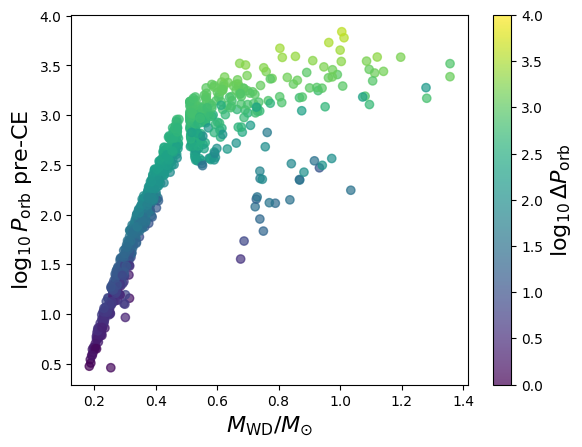

In [110]:
commonbinnums = np.intersect1d(rowList[0]['bin_num'], rowList[3]['bin_num'])
commonList3 = rowList[3].loc[rowList[3]['bin_num'].isin(commonbinnums)]
commonList0 = rowList[0].loc[rowList[0]['bin_num'].isin(commonbinnums)]
color = ['tab:orange', 'tab:blue', 'tab:purple', 'tab:red', 'tab:green']

for star in [2,3,4,5,6]:
    subList3 = commonList3.loc[commonList3['bin_num'].isin(DList[0][star])]
    subList0 = commonList0.loc[commonList0['bin_num'].isin(DList[0][star])]
    # start = startList[0].loc[startList[0]['bin_num'].isin(commonbinnums)]
    start = startList[0].loc[startList[0]['bin_num'].isin(subList0['bin_num'])]
    # print(len(start))
    # print(len(subList0))
    dif = np.log10(start['porb'])
    plt.scatter(subList0['mass_1'], dif, c=np.log10(subList3['porb'].values-subList0['porb']), label= f'kstar_1 = {star}', alpha=0.7,vmin=0, vmax=4)

plt.xlabel(r'$M_{\mathrm{WD}} / M_{\odot}$', fontsize=16)
plt.ylabel(r'$\log_{10} P_{\mathrm{orb}}$ pre-CE', fontsize=16)
# plt.title(r'Difference of $P_{\mathrm{orb}}$ for lambdaf = -5 and -35')
# plt.legend()
cb = plt.colorbar()
cb.set_label(label = r"$\log_{10} \Delta P_{\mathrm{orb}}$", size=16)
plt.savefig("dif-kstar explain", dpi=300)
plt.show()
# bigger change when pre-CE orbit period is bigger
# save this fig

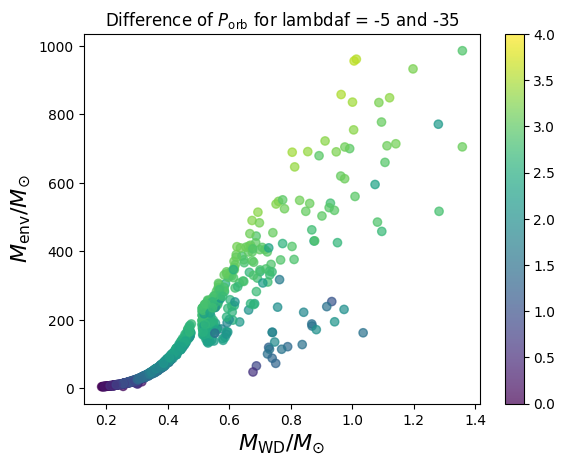

In [100]:
commonbinnums = np.intersect1d(rowList[0]['bin_num'], rowList[3]['bin_num'])
commonList3 = rowList[3].loc[rowList[3]['bin_num'].isin(commonbinnums)]
commonList0 = rowList[0].loc[rowList[0]['bin_num'].isin(commonbinnums)]
color = ['tab:orange', 'tab:blue', 'tab:purple', 'tab:red', 'tab:green']

for star in [2,3,4,5,6]:
    subList3 = commonList3.loc[commonList3['bin_num'].isin(DList[0][star])]
    subList0 = commonList0.loc[commonList0['bin_num'].isin(DList[0][star])]
    # start = startList[0].loc[startList[0]['bin_num'].isin(commonbinnums)]
    start = startList[0].loc[startList[0]['bin_num'].isin(subList0['bin_num'])]
    # print(len(start))
    # print(len(subList0))
    dif = start['rad_1']
    plt.scatter(subList0['mass_1'], dif, c=np.log10(subList3['porb'].values-subList0['porb']), label= f'kstar_1 = {star}', alpha=0.7,vmin=0, vmax=4)

plt.xlabel(r'$M_{\mathrm{WD}} / M_{\odot}$', fontsize=16)
plt.ylabel(r'$M_{\mathrm{env}} / M_{\odot}$', fontsize=16)
plt.title(r'Difference of $P_{\mathrm{orb}}$ for lambdaf = -5 and -35')
# plt.legend()
plt.colorbar()
plt.savefig("dif-kstar map", dpi=300)
plt.show()

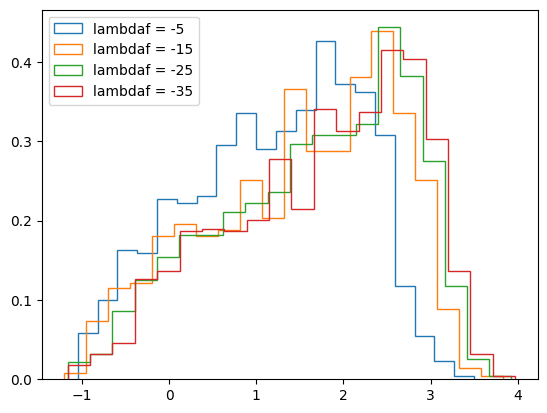

In [29]:
plt.hist(np.log10(rowList[0]['porb']), bins=20, histtype='step', label=r'lambdaf = -5', density=True)
plt.hist(np.log10(rowList[1]['porb']), bins=20, histtype='step', label=r'lambdaf = -15', density=True)
plt.hist(np.log10(rowList[2]['porb']), bins=20, histtype='step', label=r'lambdaf = -25', density=True)
plt.hist(np.log10(rowList[3]['porb']), bins=20, histtype='step', label=r'lambdaf = -35', density=True)
# plt.hist(np.log10(rowList[4]['porb']), bins=50, histtype='step', label=r'lambdaf = -45', density=True)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


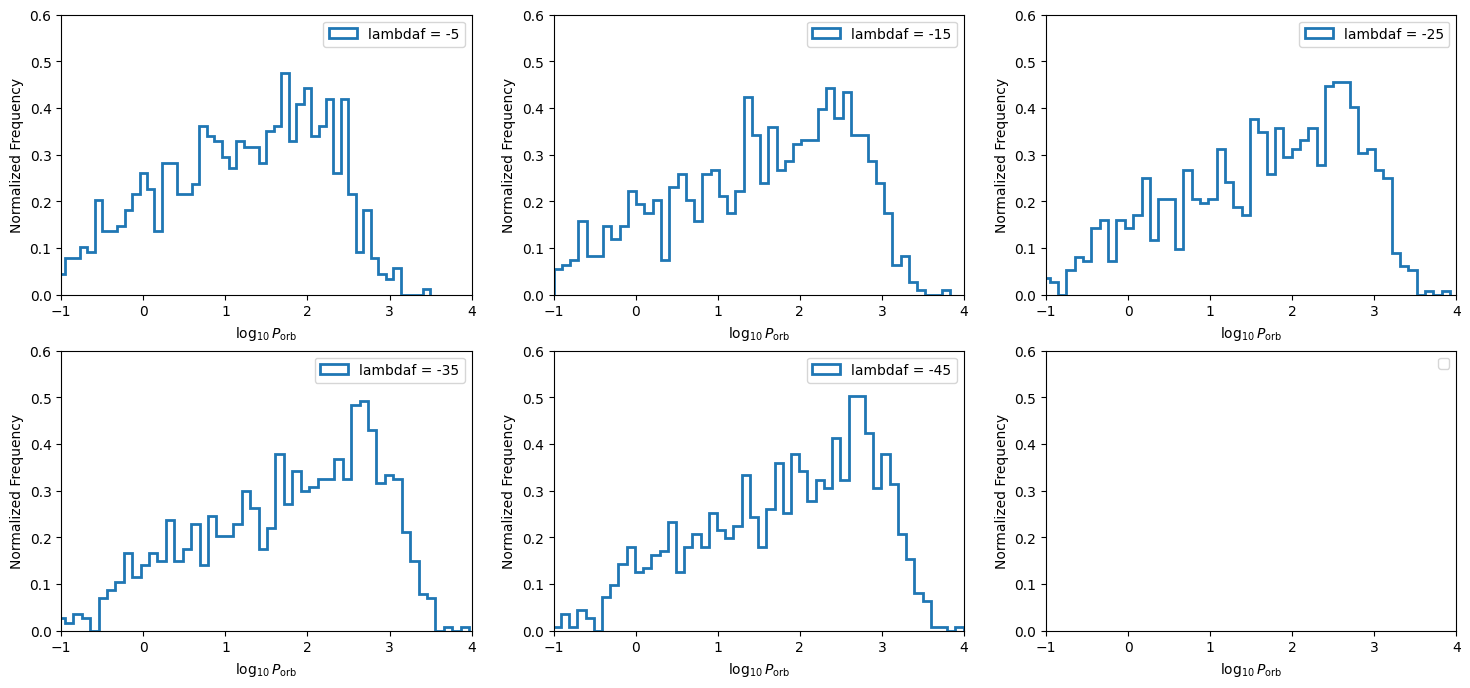

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(18,8))
axs[0][0].hist(np.log10(rowList[0]['porb']), bins=50, histtype='step', label=r'lambdaf = -5', linewidth = 2, density=True)
axs[0][1].hist(np.log10(rowList[1]['porb']), bins=50, histtype='step', label=r'lambdaf = -15', linewidth = 2, density=True)
axs[0][2].hist(np.log10(rowList[2]['porb']), bins=50, histtype='step', label=r'lambdaf = -25', linewidth = 2, density=True)
axs[1][0].hist(np.log10(rowList[3]['porb']), bins=50, histtype='step', label=r'lambdaf = -35', linewidth = 2, density=True)
axs[1][1].hist(np.log10(rowList[4]['porb']), bins=50, histtype='step', label=r'lambdaf = -45', linewidth = 2, density=True)

# Display the plot
for i in range(2):
    for j in range(3):
        axs[i][j].set_xlabel(r'$\log_{10} P_{\mathrm{orb}}$')
        axs[i][j].set_ylabel('Normalized Frequency')
        axs[i][j].set_xlim(-1, 4)
        axs[i][j].set_ylim(0, 0.6)
        axs[i][j].legend()
plt.show()